# pytorch简介

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# 随机数设置种子
torch.manual_seed(123)
np.random.seed(123)

神经网络模型

$y = f(x;\theta)$

$L = Loss(y,t)$

$\min L(\theta)$

$\theta^{k+1} = \theta^k-\eta \nabla L(\theta^k)\ k=0,1,2,...$

## torch tensor and numpy ndarray

In [16]:
x_numpy = np.array([0.1, 0.2, 0.3]) # 通过列表构造一个数组
y_numpy = np.array([1., 2., 3.])

x_torch = torch.tensor([0.1, 0.2, 0.3])
y_torch = torch.tensor([1., 2., 3.])
print(f'x_numpy = {x_numpy}, y_numpy = {y_numpy}')
print(f'x_torch = {x_torch}, y_torch = {y_torch}')

x_numpy = [0.1 0.2 0.3], y_numpy = [1. 2. 3.]
x_torch = tensor([0.1000, 0.2000, 0.3000]), y_torch = tensor([1., 2., 3.])


In [11]:
#dir(x_numpy) # 包含了大量的方法
#print(x_numpy.argmax())
#dir(x_torch) # 多出来一些方法
#x_torch = torch.tensor([0.1,0.2,0.3],requires_grad=True)
#print(x_torch)

2
tensor([0.1000, 0.2000, 0.3000], requires_grad=True)


### 相互转换

In [17]:
print(torch.from_numpy(x_numpy))
print(x_torch.numpy())
# matplotlib只能处理numpy数组绘图

tensor([0.1000, 0.2000, 0.3000], dtype=torch.float64)
[0.1 0.2 0.3]


### 四则运算

In [18]:
print(x_numpy + y_numpy, x_torch + y_torch)
print(x_numpy - y_numpy, x_torch - y_torch)
print(x_numpy * y_numpy, x_torch * y_torch)
print(x_numpy / y_numpy, x_torch / y_torch)

[1.1 2.2 3.3] tensor([1.1000, 2.2000, 3.3000])
[-0.9 -1.8 -2.7] tensor([-0.9000, -1.8000, -2.7000])
[0.1 0.4 0.9] tensor([0.1000, 0.4000, 0.9000])
[0.1 0.1 0.1] tensor([0.1000, 0.1000, 0.1000])


### 范数(norm)

In [22]:
print(np.linalg.norm(x_numpy), torch.norm(x_torch))

0.37416573867739417 tensor(0.3742)


### 对某个维度做操作

In [25]:
x_numpy = np.array([[1, 2], 
                    [3, 4]]).astype(float)
x_torch = torch.tensor([[1, 2],
                        [3, 4]]).float()
print(np.mean(x_numpy), torch.mean(x_torch))
# numpy用axis指定，pytorch用dim指定
print(np.mean(x_numpy, axis=0), torch.mean(x_torch, dim=0)) # 按列
print(np.mean(x_numpy, axis=1), torch.mean(x_torch, dim=1)) # 按行

2.5 tensor(2.5000)
[2. 3.] tensor([2., 3.])
[1.5 3.5] tensor([1.5000, 3.5000])


In [27]:
print(np.sum(x_numpy), torch.sum(x_torch))
print(np.sum(x_numpy, axis=0), torch.sum(x_torch, dim=0))
print(np.sum(x_numpy, axis=1), torch.sum(x_torch, dim=1))

10.0 tensor(10.)
[4. 6.] tensor([4., 6.])
[3. 7.] tensor([3., 7.])


### 改变形状

In [53]:
N, C, H, W = 1000, 3, 28, 28 # 类似元组打包解包功能
# N: 每次送到GPU中计算的图象数
# C: 图象通道数量
# H; 图象高度
# W: 图象宽度

X_numpy = np.random.randn(N, C, H, W) # 创建N*X*H*W规模的数组
X_torch = torch.randn((N, C, H, W))

print(X_numpy.ndim, X_torch.ndim)
print(X_numpy.shape, X_torch.shape)
print(X_numpy.reshape(N, C, -1).shape, X_torch.view(N, C, -1).shape) # -1表示第三维自己计算，N*W
print(X_numpy.reshape(-1, H, W).shape, X_torch.view(-1, H, W).shape) # -1表示第一维自己计算，N*C

4 4
(1000, 3, 28, 28) torch.Size([1000, 3, 28, 28])
(1000, 3, 784) torch.Size([1000, 3, 784])
(3000, 28, 28) torch.Size([3000, 28, 28])


### 增加维度

In [28]:
x_numpy = np.array([[1, 2, 3], 
                    [2, 3, 4]])
print(np.expand_dims(x_numpy, axis=0).shape)
print(np.expand_dims(x_numpy, axis=1).shape)
print(np.expand_dims(x_numpy, axis=-1).shape)

(1, 2, 3)
(2, 1, 3)
(2, 3, 1)


In [30]:
x_torch = torch.tensor([[1, 2, 3], 
                        [2, 3, 4]])
print(x_torch.unsqueeze(0).shape)
print(x_torch.unsqueeze(1).shape)
print(x_torch.unsqueeze(-1).shape)

print(torch.unsqueeze(x_torch, dim=0).shape)
print(torch.unsqueeze(x_torch, dim=1).shape)
print(torch.unsqueeze(x_torch, dim=-1).shape)

torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])
torch.Size([1, 2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3, 1])


### 减小维度

In [31]:
x_numpy = np.array([[[1, 2, 3], 
                     [2, 3, 4]]])
print(x_numpy.shape)
print(np.squeeze(x_numpy).shape)

(1, 2, 3)
(2, 3)


In [32]:
x_torch = torch.tensor([[[1, 2, 3], 
                         [2, 3, 4]]])
print(x_torch.shape)
print(torch.squeeze(x_torch).shape)
print(x_torch.squeeze().shape)

torch.Size([1, 2, 3])
torch.Size([2, 3])
torch.Size([2, 3])


### 自动微分(Autograd)

* 计算$e = f(a, b) = (a+b)(b+1)$的梯度
$$
\nabla f = \left(
\begin{array}{c}
a + 1 \\
a+ 2b+1
\end{array}
\right)
$$
如
$$
\nabla f\big|_{(3, 2)}= \left(
\begin{array}{c}
3 \\
8
\end{array}
\right)
$$

In [34]:
def f(x):
    return (x[0]+x[1])*(x[1]+1)
def grad_f(x):
    return x[1]+1, x[0] + 2*x[1] + 1

In [40]:
x = torch.tensor([3., 2.], requires_grad=True)
e = f(x) # 向前传播
e.backward() # 反向传播，整型数不能做反向传播
print(f'analytic grad_f: {grad_f(x)}')
print(f'autograd grad_f: {x.grad}')

analytic grad_f: (tensor(3.7178, grad_fn=<SubBackward0>), tensor(5.0100, grad_fn=<AddBackward0>))
autograd grad_f: tensor([3.7178, 5.0100])


<img src='images/3.png'>

<img src='images/4.png'>

* 令$\vec x=(x_1, x_2)^T$，计算函数
$$
f(\vec x) = 2 x_1x_2 + x_2 \cos(x_1) 
$$
的梯度
$$
\nabla f = \left(
\begin{array}{c}
2x_2 -x_2 \sin x_1 \\
2x_1 + \cos x_1
\end{array}
\right)
$$
如
$$
\nabla f\big|_{(\pi, 1)} = \left(
\begin{array}{c}
2 \\
2\pi-1
\end{array}
\right)
$$


In [45]:
def f(x):
    return 2*x[0]*x[1] + x[1] * torch.cos(x[0])
def grad_f(x):
    return 2*x[1]-x[1]*torch.sin(x[0]), 2*x[0]+torch.cos(x[0])

In [46]:
x = torch.tensor([np.pi, 1], requires_grad=True)
y = f(x)
y.backward()

print(f'analytic grad_f: {grad_f(x)}')
print(f'autograd grad_f: {x.grad}')

analytic grad_f: (tensor(2., grad_fn=<SubBackward0>), tensor(5.2832, grad_fn=<AddBackward0>))
autograd grad_f: tensor([2.0000, 5.2832])


* 计算$f(x) = (x-2)^2$的导数$f^\prime(x)=2(x-2)$

In [49]:
def f(x):
    return (x-2)**2

def f_prime(x):
    return 2*(x-2)

In [50]:
x = torch.tensor([1.0], requires_grad=True)
y = f(x)
y.backward()

print(f'analytic f_prime: {f_prime(x)}')
print(f'autograd f_prime: {x.grad}')


analytic f_prime: tensor([-2.], grad_fn=<MulBackward0>)
autograd f_prime: tensor([-2.])


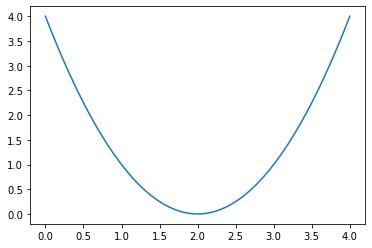

In [61]:
import matplotlib.pyplot as plt
x = np.linspace(0,4)
y = f(x)
plt.plot(x,y)
plt.show()

### 利用Autograd算得的梯度实现梯度下降法

求函数$f(x)=(x-2)^2$的极小值点。

In [62]:
x = torch.tensor([1.], requires_grad=True)
learning_rate =  0.1

print("iter\tx\tf(x)\tf'(x)\tf'(x) pytorch")
for i in range(20):
    y = f(x)
    y.backward()
    
    print(f"{i}\t{x.item():.3f}\t{y.item():.3f}\t{f_prime(x).item():.3f}\t{x.grad.item():.3f}")
    x.data -= learning_rate * x.grad # 迭代
    x.grad.detach_()
    x.grad.zero_() # 必须做，否则会把历次的梯度累加，清空x.grad

iter	x	f(x)	f'(x)	f'(x) pytorch
0	1.000	1.000	-2.000	-2.000
1	1.200	0.640	-1.600	-1.600
2	1.360	0.410	-1.280	-1.280
3	1.488	0.262	-1.024	-1.024
4	1.590	0.168	-0.819	-0.819
5	1.672	0.107	-0.655	-0.655
6	1.738	0.069	-0.524	-0.524
7	1.790	0.044	-0.419	-0.419
8	1.832	0.028	-0.336	-0.336
9	1.866	0.018	-0.268	-0.268
10	1.893	0.012	-0.215	-0.215
11	1.914	0.007	-0.172	-0.172
12	1.931	0.005	-0.137	-0.137
13	1.945	0.003	-0.110	-0.110
14	1.956	0.002	-0.088	-0.088
15	1.965	0.001	-0.070	-0.070
16	1.972	0.001	-0.056	-0.056
17	1.977	0.001	-0.045	-0.045
18	1.982	0.000	-0.036	-0.036
19	1.986	0.000	-0.029	-0.029
